In [146]:
# Подключаем библиотеки
import pandas as pd # Работа с набором данных
import numpy as np # Линейная алгебра
# Визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt

# отключение информационных сообщений
from warnings import filterwarnings
filterwarnings(action='ignore')

In [147]:
# читаем данные
url = 'https://raw.githubusercontent.com/AnnaA102/mo2025/refs/heads/main/semestr/Modeling_dataset.csv'
data = pd.read_csv(url)
data.head(5)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [148]:
# типы полей
data.dtypes

,0
STG,float64
SCG,float64
STR,float64
LPR,float64
PEG,float64
UNS,object


In [149]:
# Описательная статистика, применяется для числовых полей
data.describe()
# Найдите описательную статистику по каждоу классу отдельно (нужно использовать фильт данных в pandas)


,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


In [150]:
# количество объектов каждого класса
data.groupby('UNS').size()

,0
UNS,
High,63
Low,83
Middle,88
very_low,24


Text(0, 0.5, 'Время')

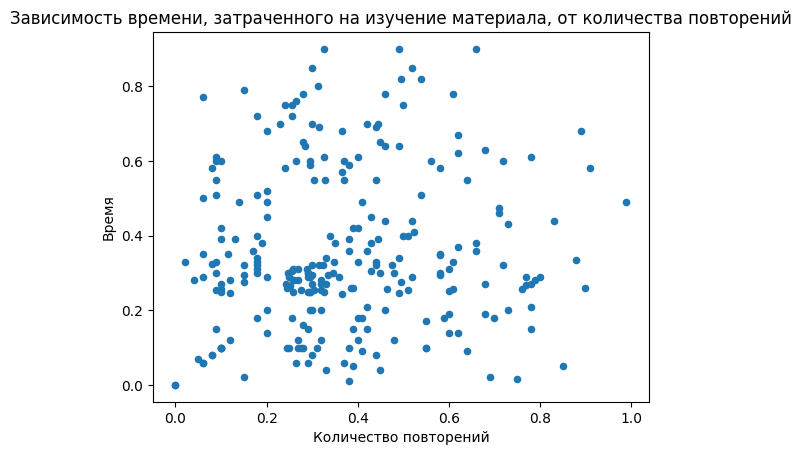

In [152]:
data.plot(kind='scatter',x='STG', y='SCG') # создадим точечную диаграмму

plt.title("Зависимость времени, затраченного на изучение материала, от количества повторений")
plt.xlabel('Количество повторений')
plt.ylabel('Время')

Text(0, 0.5, 'Время')

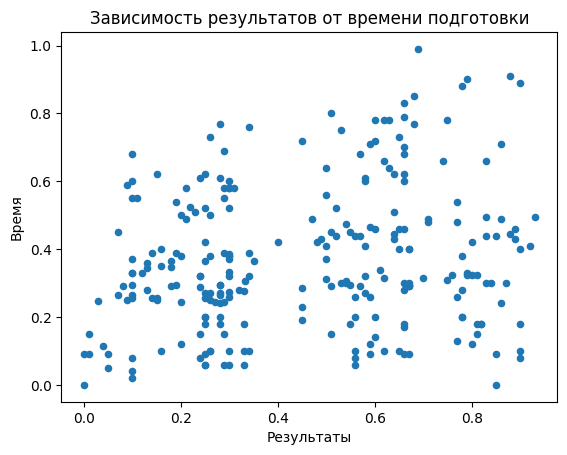

In [153]:
data.plot(kind='scatter',x='PEG', y='STG')
plt.title("Зависимость результатов от времени подготовки")
plt.xlabel('Результаты')
plt.ylabel('Время')

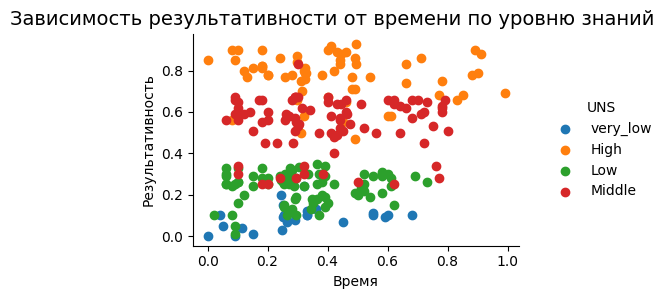

In [154]:
# используем seaborn FacetGrid чтобы отобразить элементы каждого класса
g = sns.FacetGrid(data, hue = 'UNS') \
    .map(plt.scatter, 'STG','PEG') \
    .add_legend()

g.set_axis_labels('Время', 'Результативность')

g.fig.suptitle('Зависимость результативности от времени по уровню знаний', fontsize=14)

g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)





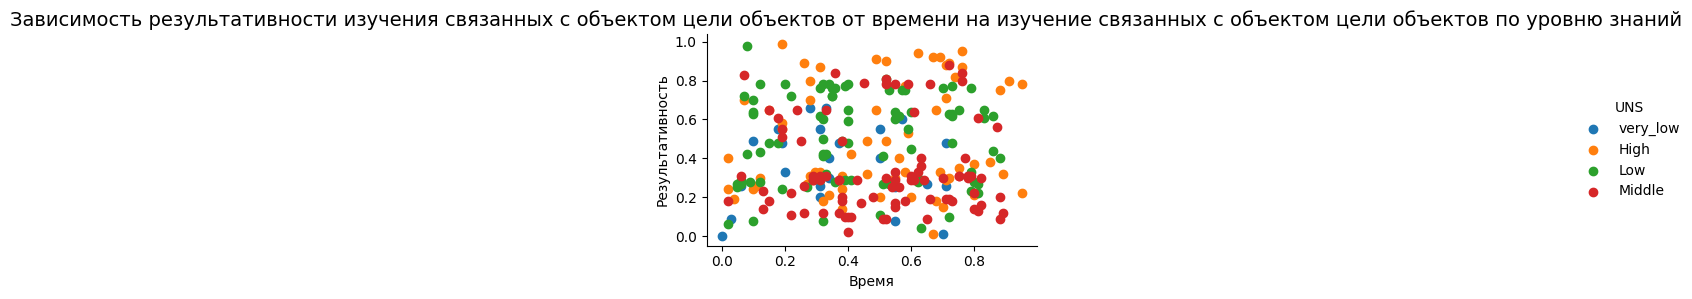

In [104]:
s = sns.FacetGrid(data, hue = 'UNS') \
    .map(plt.scatter, 'STR','LPR') \
    .add_legend()
s.set_axis_labels('Время', 'Результативность')

s.fig.suptitle('Зависимость результативности изучения связанных с объектом цели объектов от времени на изучение связанных с объектом цели объектов по уровню знаний', fontsize=14)

s.fig.tight_layout()
s.fig.subplots_adjust(top=0.9)

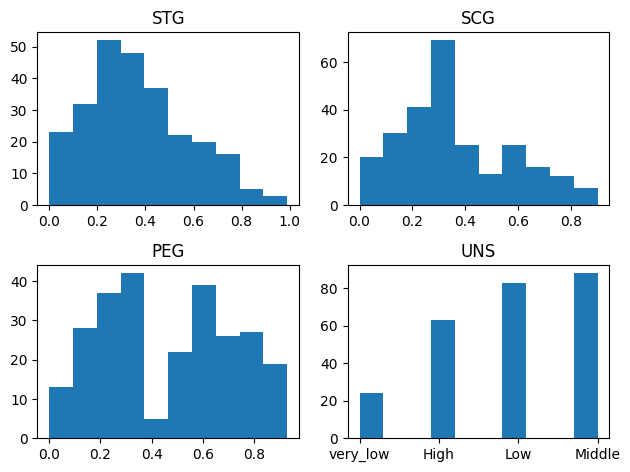

In [155]:
# Гистограммы по каждому параметру
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(data['STG'], bins = n_bins);
axs[0,0].set_title('STG');
axs[0,1].hist(data['SCG'], bins = n_bins);
axs[0,1].set_title('SCG');
axs[1,0].hist(data['PEG'], bins = n_bins);
axs[1,0].set_title('PEG');
axs[1,1].hist(data['UNS'], bins = n_bins);
axs[1,1].set_title('UNS');


fig.tight_layout(pad=1.0);

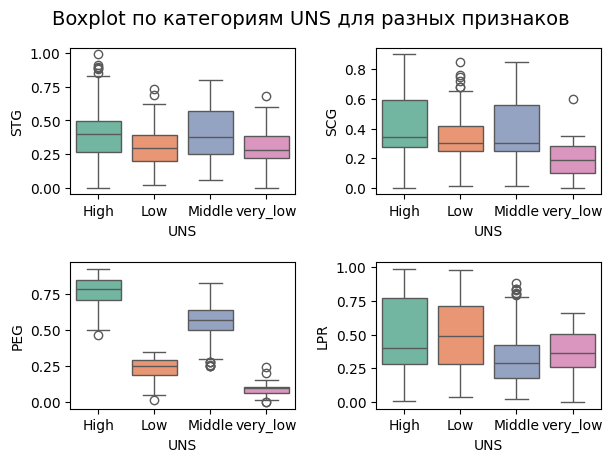

In [156]:
# диаграмма ящик с усами seaborn
fig, axs = plt.subplots(2, 2)
fn = ["STG", "SCG", "PEG", "LPR"]
classes = sorted(data["UNS"].unique())
sns.boxplot(x = 'UNS', y = 'STG', data = data, order = classes, ax = axs[0,0], palette='Set2');
sns.boxplot(x = 'UNS', y = 'SCG', data = data, order = classes, ax = axs[0,1], palette='Set2');
sns.boxplot(x = 'UNS', y = 'PEG', data = data, order = classes, ax = axs[1,0], palette='Set2');
sns.boxplot(x = 'UNS', y = 'LPR', data = data,  order = classes, ax = axs[1,1], palette='Set2');

fig.tight_layout(pad=2.0)
plt.suptitle('Boxplot по категориям UNS для разных признаков', fontsize=14)
plt.subplots_adjust(top=0.9)

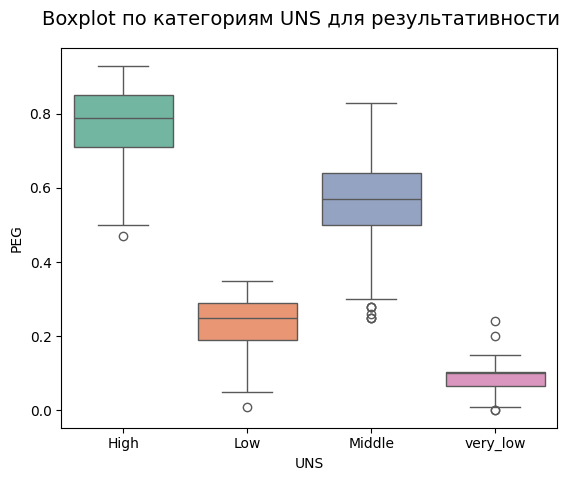

In [157]:
# Мы можем посмотреть на индивидуальный параметр в Seaborn через коробочную диаграмму.
classes = sorted(data["UNS"].unique())
sns.boxplot(x='UNS', y='PEG', data=data, order = classes,palette='Set2' )

plt.suptitle('Boxplot по категориям UNS для результативности', fontsize=14)
plt.subplots_adjust(top=0.9)

Text(48.75511574074074, 0.5, 'Плотность')

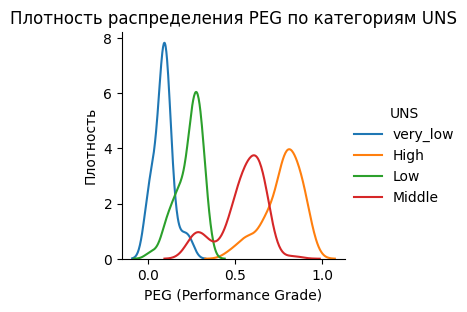

In [158]:

# который создает и визуализирует оценку плотности распределения
sns.FacetGrid(data, hue="UNS") \
   .map(sns.kdeplot, "PEG",) \
   .add_legend()
plt.title("Плотность распределения PEG по категориям UNS")
plt.xlabel("PEG (Performance Grade)")
plt.ylabel("Плотность")



Text(53.633240740740746, 0.5, 'Плотность')

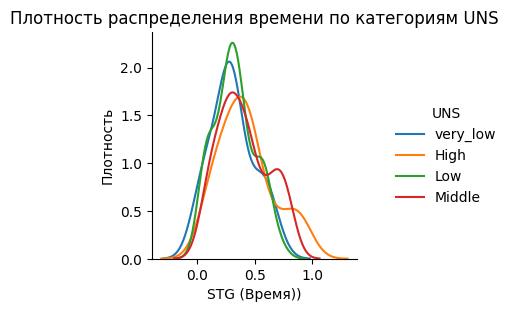

In [132]:
sns.FacetGrid(data, hue="UNS") \
   .map(sns.kdeplot, "STG") \
   .add_legend()
plt.title("Плотность распределения времени по категориям UNS")
plt.xlabel("STG (Время))")
plt.ylabel("Плотность")

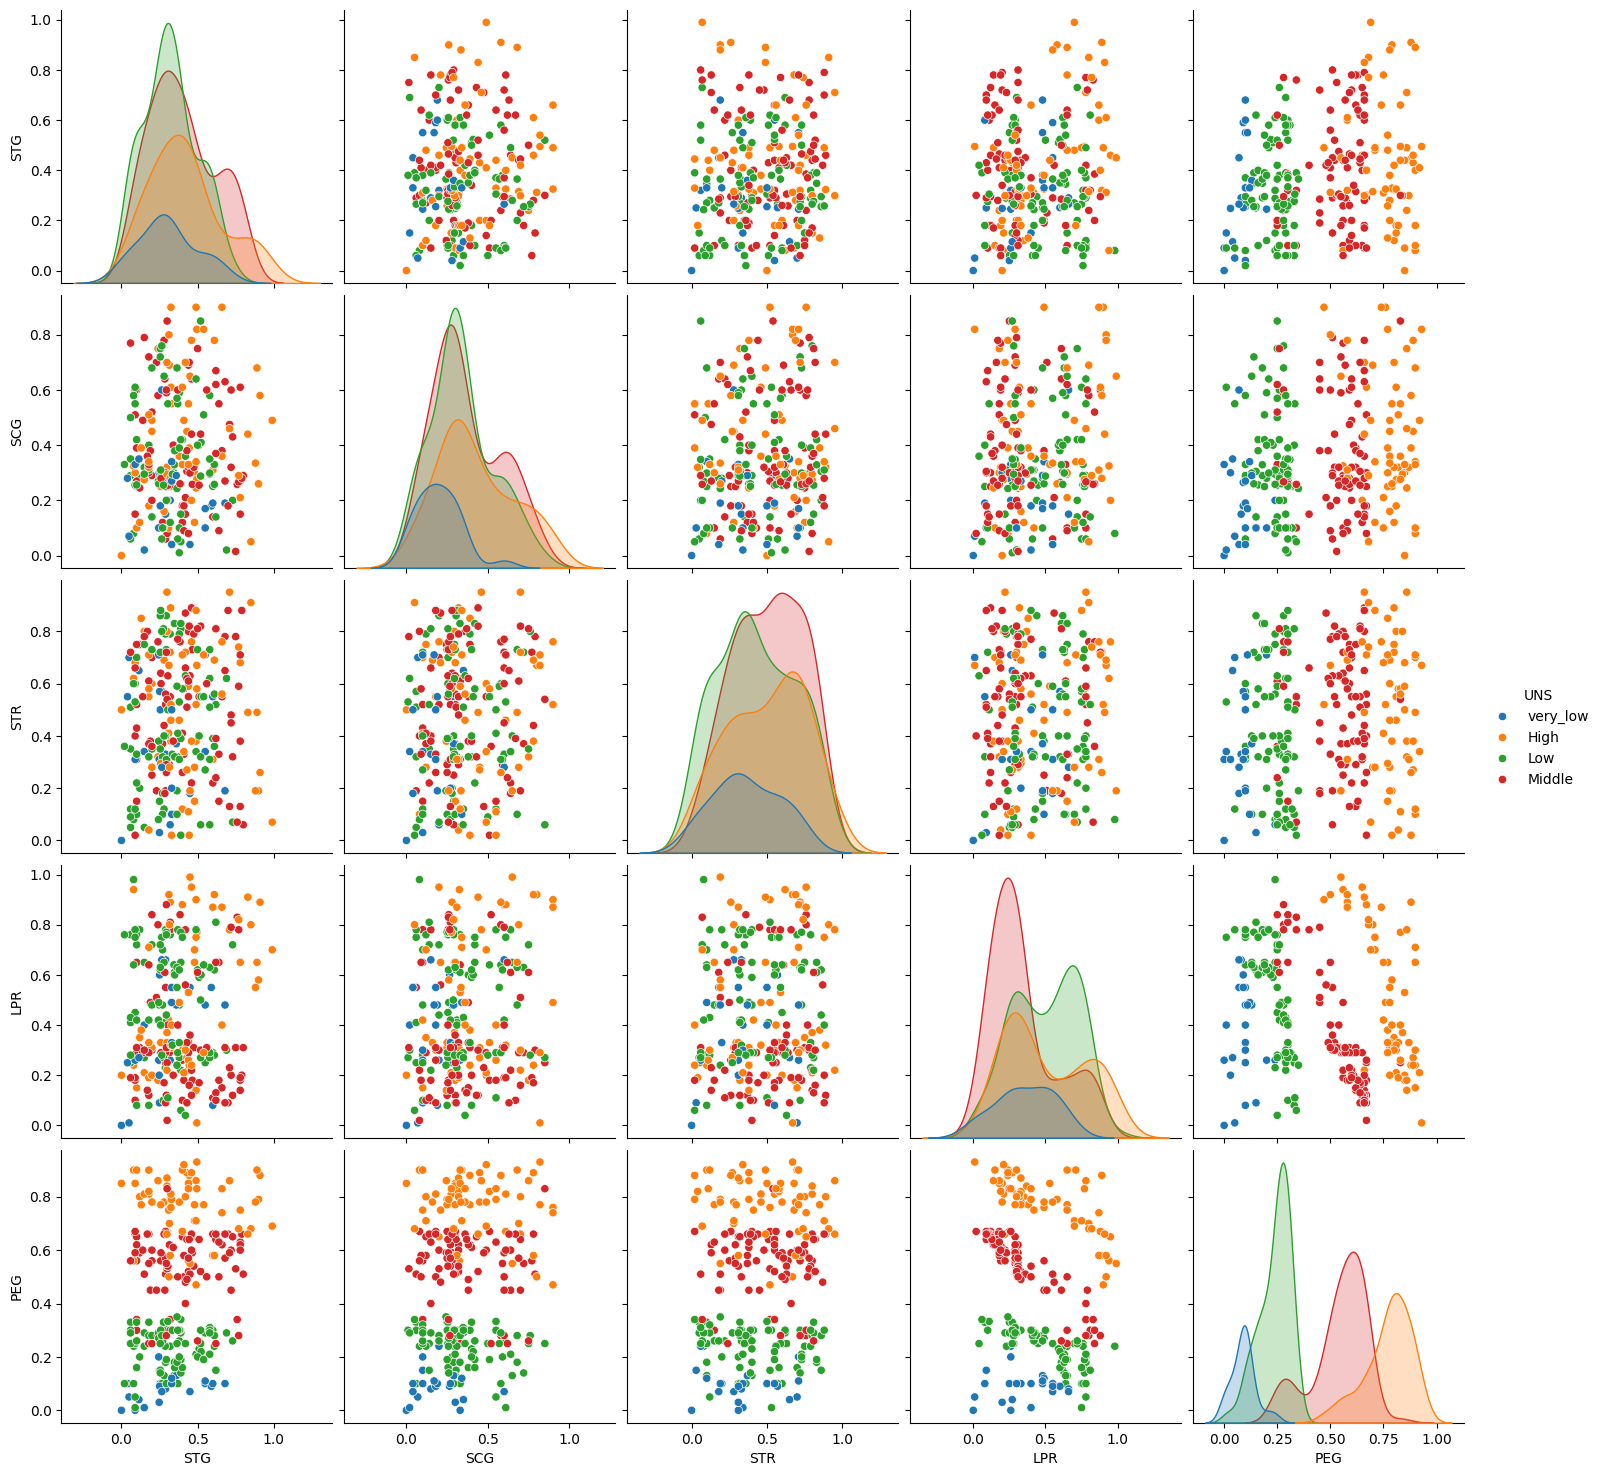

In [133]:
# двумерная связь
# матрица диаграммы рассеяния
sns.pairplot(data, hue='UNS', size=3)

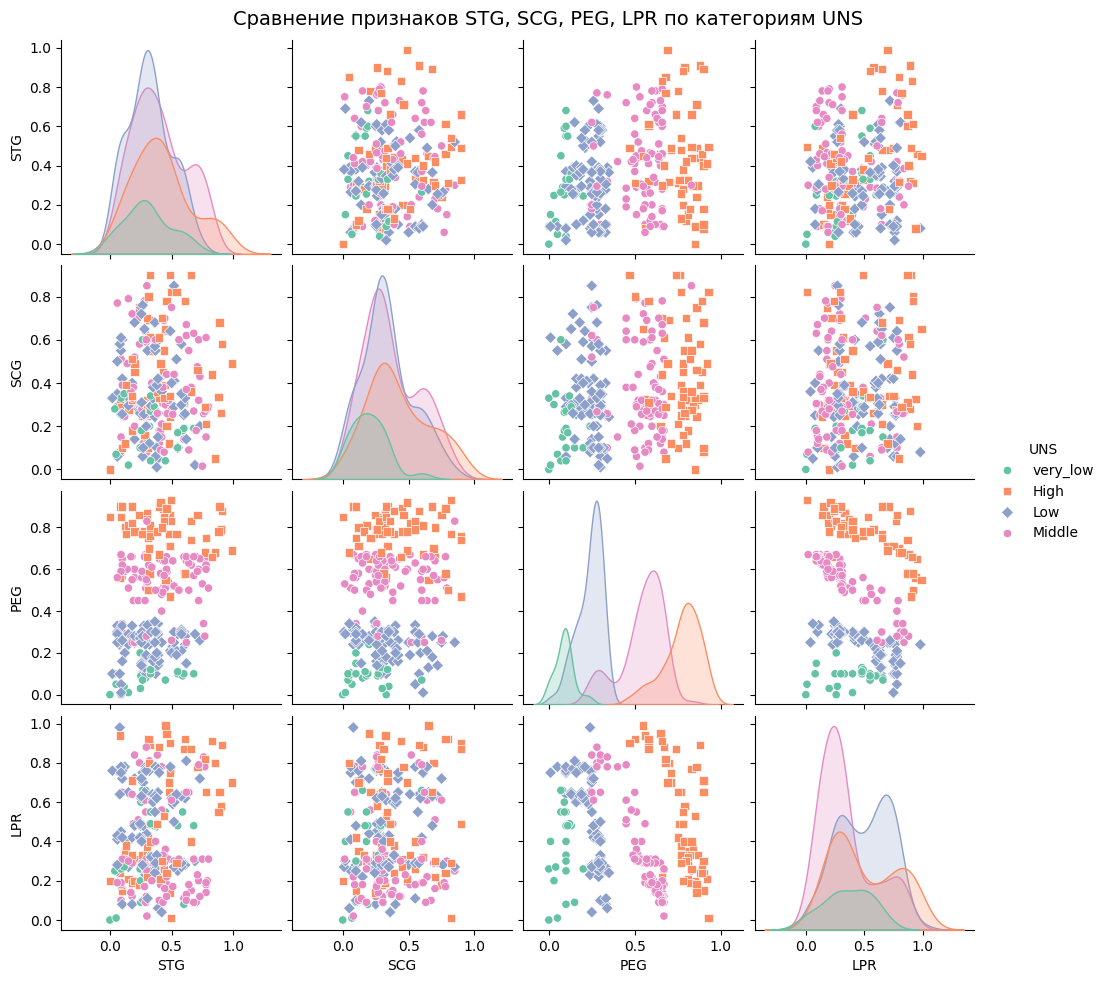

In [159]:

sns.pairplot(
    data,
    hue='UNS',                     # Категория (Low, Middle, High)
    vars=['STG', 'SCG', 'PEG', 'LPR'],  # Только числовые признаки
    height=2.5,                    # Размер каждой ячейки
    diag_kind='kde',              # Плотность на диагонали вместо гистограмм
    palette='Set2',               # Цветовая палитра
    markers=['o', 's', 'D'])     # Разные формы точек

plt.suptitle('Сравнение признаков STG, SCG, PEG, LPR по категориям UNS', fontsize=14)
plt.subplots_adjust(top=0.95)
plt.show()


Text(0.5, 1.0, 'Матрица корреляций')

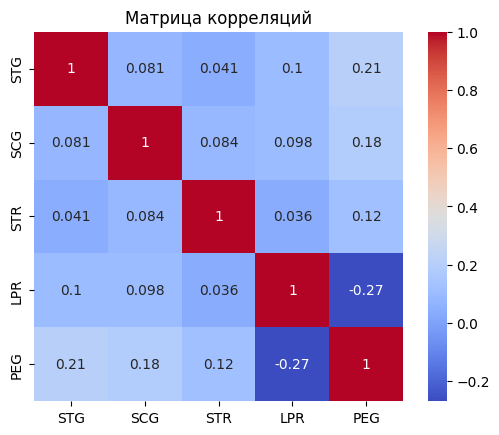

In [160]:
sns.heatmap(corrmat, annot=True, square=True, cmap="coolwarm")
plt.title("Матрица корреляций")


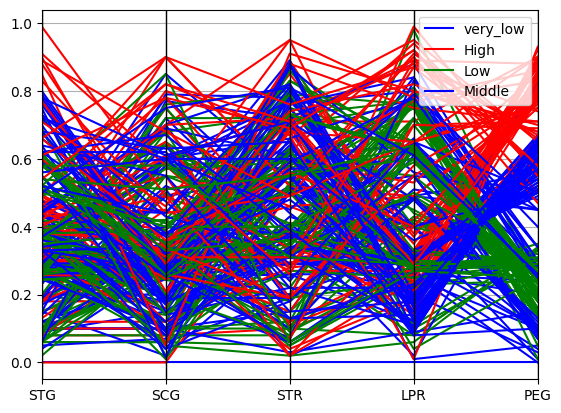

In [145]:
# parallel coordinates
pd.plotting.parallel_coordinates(data, "UNS", color = ['blue', 'red', 'green']);

## Вывод

Набор данных не содержит выбросов, пропусков и других ошибок. Из анализа данных, можно сделать вывод, что для этого набора можно решить задачу классификации и построить модель машинного обучения.